In [56]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import random
import torchvision
import numpy as np
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import copy
import os
import traceback
import datetime
from torchvision import datasets, transforms, models
from efficientnet_pytorch import EfficientNet
import math
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2
import pandas as pd
from random import shuffle
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [137]:
male_test_dir = 'TestDataset/CroppedFaces/1/'
female_test_dir = 'TestDataset/CroppedFaces/0/'
male_widerfaces_dir = 'WiderFaces/CroppedFaces/1/'
female_widerfaces_dir = 'WiderFaces/CroppedFaces/0/'

# EfficientNet trained on WiderFaces

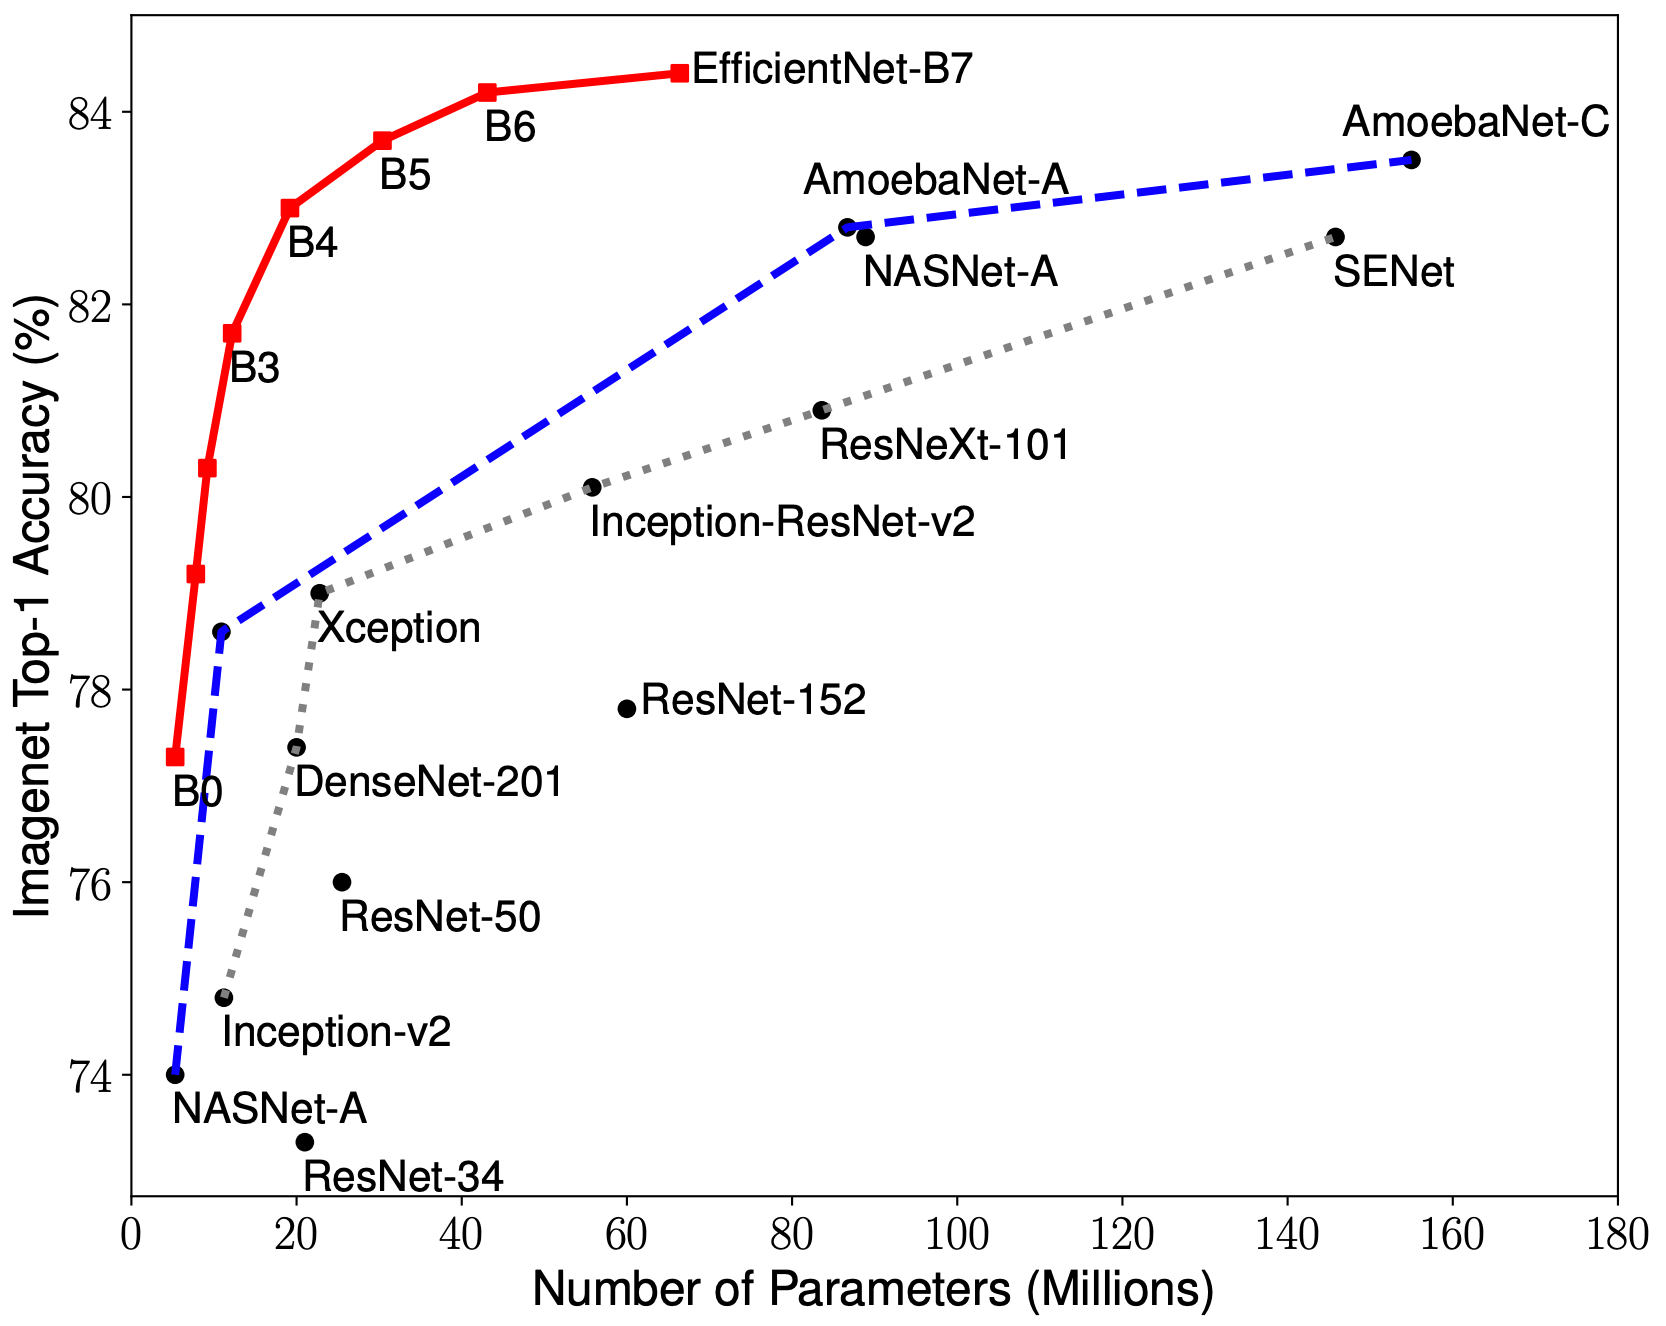

In [101]:
train_loss_b4 = np.array([0.59985099, 0.56365057, 0.55195486, 0.54679735, 0.53908001,
       0.5342011 , 0.53069071, 0.52794463, 0.52921178, 0.52971087,
       0.525452  , 0.5253335 , 0.52518364, 0.52081931, 0.52084775,
       0.52326544, 0.52185264, 0.5234638 , 0.52026343, 0.52350796,
       0.52316783, 0.52188409, 0.5198656 , 0.51939222, 0.51874303,
       0.52051153, 0.52000468, 0.51827887, 0.51800349, 0.51918827,
       0.51930214, 0.51656442, 0.51645   , 0.51684091, 0.51794271,
       0.51616254, 0.51703963, 0.51948734, 0.51900152, 0.51573063,
       0.51642533, 0.51777791, 0.51816169, 0.52035771, 0.51714839,
       0.51864058])

In [102]:
train_loss_b2 = np.array([0.6052186 , 0.56911385, 0.5574453 , 0.55016615, 0.54168102,
       0.53894525, 0.53446001, 0.53152139, 0.53218537, 0.53115029,
       0.52659135, 0.52361184, 0.52186587, 0.52220552, 0.52411116,
       0.52279879, 0.52124053, 0.52083742, 0.52303386, 0.52011177,
       0.52033576, 0.5185603 , 0.52080499, 0.52124911, 0.52336861,
       0.52385182, 0.51835908, 0.51742606, 0.51776006, 0.52208002,
       0.5215389 , 0.51827229, 0.5181963 , 0.519534  , 0.51791218,
       0.5208478 , 0.51998415, 0.51815542, 0.51819823, 0.51872568,
       0.51862968, 0.51707046, 0.51623882, 0.51550393, 0.5155136 ,
       0.51570724, 0.51681575, 0.51560851, 0.51775145, 0.52019937,
       0.51687286, 0.51716193, 0.51615627, 0.51437265, 0.5131944 ,
       0.51548408, 0.51490865, 0.51211991, 0.51397634, 0.51724344,
       0.51672456, 0.51425292, 0.51556877, 0.51441405, 0.51428412,
       0.51329801, 0.51713841, 0.51626742, 0.51434804, 0.51466166,
       0.51629464, 0.51677432, 0.51557726, 0.51343675, 0.51304958,
       0.5150763 , 0.51453029])

In [103]:
train_loss_b0 = np.array([0.60856076, 0.57111408, 0.56099927, 0.55100713, 0.54825293,
       0.54394683, 0.53996492, 0.5354263 , 0.53334227, 0.53069973,
       0.52839631, 0.52738957, 0.52686879, 0.5241123 , 0.52378575,
       0.52310428, 0.52252396, 0.52261295, 0.52228643, 0.52185731,
       0.52134645, 0.51845763, 0.51941696, 0.51881798, 0.52049083,
       0.5188519 , 0.51859298, 0.52013841, 0.52021711, 0.51773428,
       0.51545191, 0.51574762, 0.51617709, 0.51644041, 0.5157785 ,
       0.51686641, 0.51540858, 0.51500336, 0.51501249, 0.51628815,
       0.51571677, 0.51459266, 0.51391325, 0.51446047, 0.51389925,
       0.51506632, 0.51373299, 0.51296119, 0.51623298, 0.51637701,
       0.51739708, 0.51638749, 0.51580694, 0.51584595, 0.51818495,
       0.51472711, 0.51504064, 0.51506162, 0.51875502, 0.5135307 ,
       0.51279921, 0.51405837, 0.5130916 , 0.51420885, 0.51471513,
       0.51377036, 0.51513551, 0.51481467, 0.51644905, 0.51559136,
       0.51441392, 0.51687581, 0.51259916, 0.51224624, 0.51268969,
       0.51415301, 0.51350467, 0.51389328, 0.51517838, 0.51422734,
       0.51297072, 0.51421655, 0.51216522, 0.51387969, 0.51533993,
       0.51430353, 0.51533056, 0.51539622, 0.51447393, 0.51307328,
       0.51401379, 0.51558578, 0.51619216, 0.5127755 , 0.51366809,
       0.51281459, 0.51342048, 0.51236066, 0.51167401, 0.51235478,
       0.51243799, 0.51199771, 0.51168784, 0.51292284, 0.51207089,
       0.5139119 , 0.51293784, 0.51303459, 0.5124369 , 0.51729528,
       0.51236272, 0.51111084, 0.51069446, 0.51310922])

In [104]:
train_loss_resnet_50 = np.array([0.64653235, 0.6203505 , 0.61718526, 0.61393385, 0.61307396,
       0.61182842, 0.61240318, 0.61031286, 0.6098428 , 0.60857303,
       0.60850796, 0.60867264, 0.60902749, 0.60466904, 0.6079799 ,
       0.607366  , 0.60490584, 0.60805841, 0.60660642, 0.6055448 ,
       0.60535359, 0.60741585, 0.60462402, 0.6041952 , 0.60272666,
       0.60244788, 0.60303182, 0.60419609, 0.60242472, 0.60225578,
       0.60301199, 0.60206481, 0.60140062, 0.59988652, 0.59918293,
       0.60084441, 0.59798817, 0.59897382, 0.599241  , 0.59663436,
       0.59781739, 0.5958732 , 0.59572171, 0.59482191, 0.59500719,
       0.5978633 , 0.59482827, 0.59347686, 0.5924632 , 0.59191896,
       0.59385116, 0.58978909, 0.59220737, 0.59203889, 0.59018709,
       0.5877888 , 0.59091345, 0.58771855, 0.58886294, 0.58689065,
       0.58511811, 0.58576459, 0.58548203, 0.58721575, 0.58681743,
       0.58577648, 0.58473845, 0.58403157, 0.58478771, 0.58363727,
       0.58310269, 0.58100876, 0.58186875])

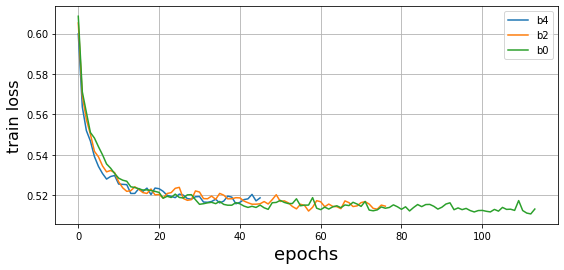

In [107]:
def draw_trainloss():
    fig = plt.figure()
    fig.set_size_inches(9, 4)

    min_loss = min(np.concatenate((train_loss_b4, train_loss_b2, train_loss_b0, train_loss_resnet_50)))
    #plt.axline((0,min_loss), (len(train_loss_b4),min_loss))
    plt.plot(range(0, len(train_loss_b4)),train_loss_b4, label='b4')
    plt.plot(range(0, len(train_loss_b2)),train_loss_b2, label='b2')
    plt.plot(range(0, len(train_loss_b0)),train_loss_b0, label='b0')
    #plt.plot(range(0, len(train_loss_resnet_50)),train_loss_resnet_50, label='resnet')
    plt.legend()
    plt.grid(True)
    plt.xlabel('epochs', fontsize=18)
    plt.ylabel('train loss', fontsize=16)
draw_trainloss()

In [ ]:
f1_b4_more_epoch = np.array([0.77234825, 0.85938961, 0.88914612, 0.90028133, 0.92052184,
       0.93542485, 0.93772361, 0.94581791, 0.94291558, 0.94267163,
       0.95253327, 0.9521066 , 0.95210683, 0.96359274, 0.96407998,
       0.95581637, 0.96173501, 0.95585346, 0.9649098 , 0.95628248,
       0.95670557, 0.95931586, 0.96537666, 0.9649179 , 0.96834817,
       0.96228779, 0.96415561, 0.97018646, 0.96803818, 0.9657293 ,
       0.96649631, 0.97184706, 0.97163587, 0.97275875, 0.97001996,
       0.97482568, 0.97187484, 0.96504725, 0.96747651, 0.97451388,
       0.97274471, 0.97104397, 0.9677098 , 0.96330232, 0.97124903,
       0.96994772])

In [117]:
f1_b0 = np.array([0.74553584, 0.84417013, 0.86901644, 0.89541713, 0.89675685,
       0.90837259, 0.91768327, 0.92634407, 0.93334793, 0.93861419,
       0.94485894, 0.94655801, 0.94916649, 0.95617493, 0.95445069,
       0.95658784, 0.95878777, 0.95785487, 0.95943976, 0.96222041,
       0.96219046, 0.96698898, 0.96636926, 0.96855329, 0.96508292,
       0.96673766, 0.9685896 , 0.96372741, 0.96355993, 0.96858601,
       0.97458905, 0.97481998, 0.97297571, 0.97232471, 0.97274618,
       0.97237567, 0.976833  , 0.97703221, 0.97615728, 0.97325634,
       0.97410607, 0.97756957, 0.9799869 , 0.9780846 , 0.97902839,
       0.97659952, 0.97889293, 0.98050815, 0.97359794, 0.97349262,
       0.97159137, 0.97328786, 0.97337079, 0.9760215 , 0.96954808,
       0.97755936, 0.97534928, 0.97690441, 0.97005164, 0.97907219,
       0.981873  , 0.97907422, 0.980598  , 0.97880763, 0.97807784,
       0.9785275 , 0.97552325, 0.97677667, 0.97257429, 0.97469843,
       0.97826804, 0.97315162, 0.98303544, 0.98241418, 0.9819695 ,
       0.97877178, 0.98135277, 0.98030618, 0.97650908, 0.97942035,
       0.98202513, 0.97807217, 0.98337719, 0.9786321 , 0.97544576,
       0.97860466, 0.97777321, 0.97710191, 0.97701971, 0.98171948,
       0.97930736, 0.97490165, 0.97325395, 0.98252318, 0.9788002 ,
       0.98258004, 0.98151398, 0.98345829, 0.9834708 , 0.98229496,
       0.9823409 , 0.98360852, 0.98448353, 0.98209729, 0.98259339,
       0.97781158, 0.98132296, 0.98118523, 0.98278916, 0.97040269,
       0.98126554, 0.98543539, 0.98576891, 0.98159647])

In [ ]:
resnet_50_f1 = np.array([0.51717312, 0.70026124, 0.70427031, 0.71696337, 0.72075081,
       0.72430848, 0.72565674, 0.73229351, 0.7314867 , 0.73884242,
       0.73105033, 0.74530534, 0.73810617, 0.75299731, 0.73917709,
       0.7367179 , 0.75003489, 0.73559505, 0.74430069, 0.74487025,
       0.74826724, 0.73252256, 0.74855785, 0.74808751, 0.76021572,
       0.75643408, 0.76173415, 0.74940503, 0.75284194, 0.76377917,
       0.75198575, 0.75605644, 0.76123852, 0.76048536, 0.76017506,
       0.76123278, 0.77529628, 0.76634178, 0.76838224, 0.77133836,
       0.76738398, 0.77703093, 0.77775145, 0.77535304, 0.77924553,
       0.77245922, 0.78082615, 0.77879033, 0.78717026, 0.78609693,
       0.77751601, 0.79018782, 0.79049522, 0.78437521, 0.79236709,
       0.79738984, 0.78992533, 0.80163305, 0.79780963, 0.80270017,
       0.80481374, 0.80367896, 0.80251467, 0.80085923, 0.79763415,
       0.80295778, 0.80918511, 0.81147141, 0.80700816, 0.80831296,
       0.81155167, 0.8167119 , 0.81617485])

In [80]:
from efficientnet_pytorch import EfficientNet
class MyModel(nn.Module):
    def __init__(self, model_name: str):
        super(MyModel,self).__init__()

        # self.model = torch.hub.load('pytorch/vision:v0.9.0', 'inception_v3', pretrained=True)
        self.model = EfficientNet.from_pretrained(model_name)
        self.model.set_swish(memory_efficient=False)
        self.linear1 = torch.nn.Linear(1000, 1)
        self.activation3 = torch.nn.Sigmoid()

    def forward(self,x):
        answ = self.model(x)
        #print(answ.shape)
        #answ = self.encoder(answ)
        #print(answ.shape)
        answ = self.activation3(self.linear1(answ))

        return answ


In [81]:
transform_efnet=transforms.Compose([transforms.Resize((150,150)),
                              transforms.ToTensor()
                              ])

In [82]:
def init_ef_model(model_name, model_path):
    device = torch.device('cpu')
    model = MyModel(model_name)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval();
    return model

In [83]:
def get_res_efnet(image_path: str, model: MyModel):
    image = Image.open(image_path)
    image = transform_efnet(image).unsqueeze(0)

    # model.cuda()
    # Set layers such as dropout and batchnorm in evaluation mode
    # model.eval();

    # Get the 1000-dimensional model output
    with torch.no_grad():
        out = model(image)
    # print(out.detach().numpy()[0][0])    
    return out.detach().numpy()[0][0]

## EfficientNet-b0

In [165]:
model_b0_name = 'efficientnet-b0'
model_b0_path = 'PretrainedModels/GenderEstimation/Ours/ef_b0.pth'

In [166]:
b0_model = init_ef_model(model_b0_name, model_b0_path)

Loaded pretrained weights for efficientnet-b0


In [86]:
def get_res_b0(image_path: str):
    return get_res_efnet(image_path, b0_model)

### Results on test set

In [87]:
acc_b0, prec_b0, rec_b0, f1_b0 = get_scores(get_res_b0)

TP: 170, FP: 14, TN: 100, FN: 25
Metrics:
Accuracy: 0.8737864077669902
Precision: 0.9239130434782609
Recall: 0.8717948717948718
F1_Score: 0.8970976253298153


### Results on WiderFace

In [27]:
get_scores(get_res_b0, test_set=False)

TP: 485, FP: 19, TN: 481, FN: 15
Metrics:
Accuracy: 0.966
Precision: 0.9623015873015873
Recall: 0.97
F1_Score: 0.9661354581673307


(0.966, 0.9623015873015873, 0.97, 0.9661354581673307)

### Inference time

In [117]:
min_time_b0, max_time_b0, avg_time_b0 = get_times(get_res_b0)

Time:
Min time: 0.2373650074005127
Max time: 0.3919520378112793
Avg time: 0.27817320251464844


## EfficientNet-b2

In [167]:
model_b2_name = 'efficientnet-b2'
model_b2_path = 'PretrainedModels/GenderEstimation/Ours/ef_b2_more_epochs.pth'

In [168]:
b2_model = init_ef_model(model_b2_name, model_b2_path)

Loaded pretrained weights for efficientnet-b2


In [169]:
def get_res_b2(image_path: str):
    return get_res_efnet(image_path, b2_model)

### Results on test set

In [91]:
acc_b2, prec_b2, rec_b2, f1_b2 = get_scores(get_res_b2)

TP: 173, FP: 17, TN: 97, FN: 22
Metrics:
Accuracy: 0.8737864077669902
Precision: 0.9105263157894737
Recall: 0.8871794871794871
F1_Score: 0.8987012987012988


### Results on WiderFace

In [31]:
get_scores(get_res_b2, test_set=False)

TP: 485, FP: 11, TN: 489, FN: 15
Metrics:
Accuracy: 0.974
Precision: 0.9778225806451613
Recall: 0.97
F1_Score: 0.9738955823293172


(0.974, 0.9778225806451613, 0.97, 0.9738955823293172)

### Inference time

In [112]:
min_time_b2, max_time_b2, avg_time_b2 = get_times(get_res_b2)

Time:
Min time: 0.3919541835784912
Max time: 1.1987965106964111
Avg time: 0.5123051686286926


## EfficientNet-b4

In [170]:
model_b4_name = 'efficientnet-b4'
model_b4_path = 'PretrainedModels/GenderEstimation/Ours/ef_b4.pth'

In [171]:
b4_model = init_ef_model(model_b4_name, model_b4_path)

Loaded pretrained weights for efficientnet-b4


In [172]:
def get_res_b4(image_path: str):
    return get_res_efnet(image_path, b4_model)

### Results on test set

In [95]:
acc_b4, prec_b4, rec_b4, f1_b4 = get_scores(get_res_b4)

TP: 175, FP: 19, TN: 95, FN: 20
Metrics:
Accuracy: 0.8737864077669902
Precision: 0.9020618556701031
Recall: 0.8974358974358975
F1_Score: 0.8997429305912596


### Results on WiderFace

In [35]:
get_scores(get_res_b4, test_set=False)

TP: 487, FP: 13, TN: 487, FN: 13
Metrics:
Accuracy: 0.974
Precision: 0.974
Recall: 0.974
F1_Score: 0.974


(0.974, 0.974, 0.974, 0.974)

### Inference time

In [113]:
min_time_b4, max_time_b4, avg_time_b4 = get_times(get_res_b4)

Time:
Min time: 0.7619607448577881
Max time: 1.6595890522003174
Avg time: 0.8659273972511291


# Gil Levi and Tal Hassner model trained on Adience

In [173]:
genderProto = "PretrainedModels/GenderEstimation/OthersModels/gender_deploy.prototxt"
genderModel = "PretrainedModels/GenderEstimation/OthersModels/gender_net.caffemodel"

In [174]:
def get_res_adience(image_path):
    genderNet = cv2.dnn.readNet(genderModel, genderProto)
    genderList = ['Male', 'Female']
    face = cv2.imread(image_path)
    MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
    blob = cv2.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds = genderNet.forward()
    gender = genderList[genderPreds[0].argmax()]
    if gender == 'Female':
        return 0
    else:
        return 1

### Results on test set

In [99]:
acc_adience, prec_adience, rec_adience, f1_adience = get_scores(get_res_adience)

TP: 117, FP: 14, TN: 100, FN: 78
Metrics:
Accuracy: 0.7022653721682848
Precision: 0.8931297709923665
Recall: 0.6
F1_Score: 0.7177914110429446


### Results on WiderFace

In [21]:
get_scores(get_res_adience, test_set=False)

TP: 366, FP: 125, TN: 375, FN: 132
Metrics:
Accuracy: 0.7424849699398798
Precision: 0.745417515274949
Recall: 0.7349397590361446
F1_Score: 0.7401415571284126


(0.7424849699398798, 0.745417515274949, 0.7349397590361446, 0.7401415571284126)

### Inference time

In [114]:
min_time_adience, max_time_adience, avg_time_adience = get_times(get_res_adience)

Time:
Min time: 0.11764931678771973
Max time: 0.24235272407531738
Avg time: 0.13374355888366699


# VGG-Face model trained on IMDb-Wiki

In [175]:
from deepface import DeepFace

In [176]:
def get_res_vgg_imdb(image_path):
    obj = DeepFace.analyze(image_path, actions = ['gender'], enforce_detection=False)
    gender = obj['gender']
    res = 1 if gender == 'Man' else 0
    clear_output()
    return res

### Results on test set

In [102]:
acc_vgg_imdb, prec_vgg_imdb, rec_vgg_imdb, f1_vgg_imdb = get_scores(get_res_vgg_imdb)

TP: 192, FP: 104, TN: 10, FN: 3
Metrics:
Accuracy: 0.6537216828478964
Precision: 0.6486486486486487
Recall: 0.9846153846153847
F1_Score: 0.7820773930753564


### Results on WiderFace

In [25]:
get_scores(get_res_vgg_imdb, test_set=False)

TP: 485, FP: 350, TN: 150, FN: 15
Metrics:
Accuracy: 0.635
Precision: 0.5808383233532934
Recall: 0.97
F1_Score: 0.7265917602996255


(0.635, 0.5808383233532934, 0.97, 0.7265917602996255)

### Inference time

In [115]:
min_time_vgg_imdb, max_time_vgg_imdb, avg_time_vgg_imdb = get_times(get_res_vgg_imdb)

Time:
Min time: 1.568796157836914
Max time: 2.8674840927124023
Avg time: 1.7493990716934205


# FairFace

In [177]:
import dlib

In [178]:
def get_res_fairface(image_path):
    device = torch.device('cpu')
    model_fair_4 = torchvision.models.resnet34(pretrained=True)
    model_fair_4.fc = nn.Linear(model_fair_4.fc.in_features, 18)
    model_fair_4.load_state_dict(torch.load('PretrainedModels/GenderEstimation/OthersModels/fairface_alldata_4race_20191111.pt', map_location=device))
    model_fair_4 = model_fair_4.to(device)
    model_fair_4.eval()
    trans = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = dlib.load_rgb_image(image_path)
    image = trans(image)
    image = image.view(1, 3, 224, 224)  # reshape image to match model dimensions (1 batch size)
    image = image.to(device)

    # fair
    with torch.no_grad():
        outputs = model_fair_4(image)
        outputs = outputs.cpu().detach().numpy()
        outputs = np.squeeze(outputs)

    gender_outputs = outputs[7:9]
    gender_score = np.exp(gender_outputs) / np.sum(np.exp(gender_outputs))
    gender_pred = np.argmax(gender_score)
    return 1 if gender_pred == 0 else 0

### Results on test set

In [105]:
acc_fairface, prec_fairface, rec_fairface, f1_fairface = get_scores(get_res_fairface)

TP: 175, FP: 36, TN: 78, FN: 20
Metrics:
Accuracy: 0.8187702265372169
Precision: 0.8293838862559242
Recall: 0.8974358974358975
F1_Score: 0.8620689655172414


### Results on WiderFace

In [28]:
get_scores(get_res_fairface, test_set=False)

TP: 459, FP: 135, TN: 365, FN: 36
Metrics:
Accuracy: 0.828140703517588
Precision: 0.7727272727272727
Recall: 0.9272727272727272
F1_Score: 0.8429752066115703


(0.828140703517588, 0.7727272727272727, 0.9272727272727272, 0.8429752066115703)

### Inference time

In [116]:
min_time_fairface, max_time_fairface, avg_time_fairface = get_times(get_res_fairface)

Time:
Min time: 0.8669397830963135
Max time: 1.6116909980773926
Avg time: 0.9408698883056641


# Results

## Results on WiderFace

| Method          | Trained on | Precision | Recall  | F1    |
|-----------------|------------|-----------|---------|-------|
| EfficientNet-B0 | Our        | 0.962     |0.97   |0.966|
| EfficientNet-B2 | Our        | 0.978     |0.97   | 0.974 |
| **EfficientNet-B4** | **Our**        | **0.974**     | **0.974**  | **0.974**   |
| Gil Levi model  | Adience    |0.745     | 0.735    |0.740|
| VGG-Face        | IMDb-WIKI  |0.581     | 0.97   | 0.727|
| FairFace        | FairFace   |0.773    | 0.927   | 0.843 |

## Results on forensic set

| Method          | Trained on | Precision | Recall  | F1    |
|-----------------|------------|-----------|---------|-------|
| EfficientNet-B0 | Our        | 0.924     | 0.872   | 0.897 |
| EfficientNet-B2 | Our        | 0.911     | 0.887   | 0.899 |
| **EfficientNet-B4** | **Our**        | **0.902**     | **0.897**  | **0.9**   |
| Gil Levi model  | Adience    | 0.893     | 0.6     | 0.718 |
| VGG-Face        | IMDb-WIKI  | 0.649     | 0.985   | 0.782 |
| FairFace        | FairFace   | 0.829     | 0.897   | 0.862 |

## Inference latency

| Method          | Min time | Max time | Avg time |
|-----------------|-----------|----------|----------|
| EfficientNet-B0 | 0.24     | 0.39     | 0.28     |
| EfficientNet-B2 | 0.39     | 1.2      | 0.51     |
| EfficientNet-B4 | 0.76     | 1.66     | 0.87     |
| **Gil Levi model**  | **0.12**     |**0.24**     | **0.13**     |
| VGG-Face        | 1.57     | 2.87     | 1.75     |
| FairFace        | 0.87     | 1.61     | 0.94     |

## ROC-AUC on forensic set

In [214]:
testy_bo, probs_b0 = get_probs(get_res_b0)
testy_b2, probs_b2 = get_probs(get_res_b2)
testy_b4, probs_b4 = get_probs(get_res_b4)
testy_g, probs_g = get_probs(get_res_adience)
testy_vgg, probs_vgg = get_probs(get_res_vgg_imdb)
testy_f, probs_f = get_probs(get_res_fairface)

In [215]:
fpr_b0, tpr_b0, auc_b0 = get_fpr_tpr_auc(testy_bo, probs_b0)
fpr_b2, tpr_b2, auc_b2 = get_fpr_tpr_auc(testy_b2, probs_b2)
fpr_b4, tpr_b4, auc_b4 = get_fpr_tpr_auc(testy_b4, probs_b4)
fpr_g, tpr_g, auc_g = get_fpr_tpr_auc(testy_g, probs_g)
fpr_vgg, tpr_vgg, auc_vgg = get_fpr_tpr_auc(testy_vgg, probs_vgg)
fpr_f, tpr_f, auc_f = get_fpr_tpr_auc(testy_f, probs_f)

In [216]:
roc_dict = {"EfficientNet-B0" : [fpr_b0, tpr_b0, auc_b0],
           "EfficientNet-B2" : [fpr_b2, tpr_b2, auc_b2],
           "EfficientNet-B4" : [fpr_b4, tpr_b4, auc_b4],
           "Gil Levi model" : [fpr_g, tpr_g, auc_g],
           "VGG-Face" : [fpr_vgg, tpr_vgg, auc_vgg],
           "FairFace" : [fpr_f, tpr_f, auc_f]}

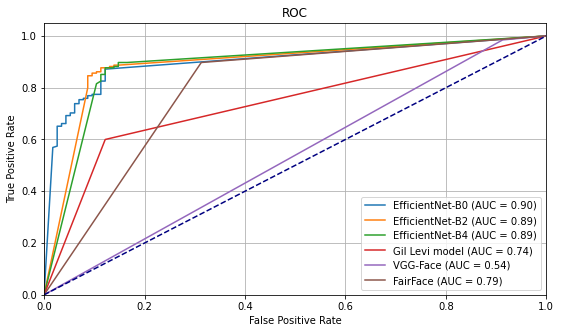

In [252]:
fig = plt.figure()
fig.set_size_inches(9, 5)
    
for method in roc_dict:
    fpr, tpr, roc_auc = roc_dict[method]
    plt.plot(fpr, tpr,
         label=method + ' (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Helpers

In [3]:
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [182]:
def get_fpr_tpr_auc(testy, probs):
    probs = np.array(probs)[:, 1]
    fpr, tpr, treshold = roc_curve(testy, probs)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

In [213]:
def get_probs(get_res):
    testy = []
    probs = []
    
    # males
    for image_name in os.listdir(male_test_dir):
        image_path = male_test_dir + image_name
        try:
            res = get_res(image_path)
        except: 
            print("Exception on " + image_path)
            continue
        testy.append(1)
        if (res >= 0.5):            
            probs.append([0, (res - 0.5) * 2])
        else: 
            probs.append([(0.5 - res) * 2, 0])
    # females
    for image_name in os.listdir(female_test_dir):
        image_path = female_test_dir + image_name
        try:
            res = get_res(image_path)
        except: 
            print("Exception on " + image_path)
            continue
        testy.append(0)
        if (res < 0.5):
            probs.append([(0.5 - res) * 2, 0])
        else: 
            probs.append([0, (res - 0.5) * 2])
    
    return testy, probs

In [20]:
def get_scores(get_res, test_set=True):
    """
    get_res -- function with input 'image_path' and output -- result of analysis
    """
    TP = 0
    FP = 0
    TN = 0
    FN = 0    

    male_dir = male_test_dir if test_set else male_widerfaces_dir
    female_dir = male_test_dir if test_set else female_widerfaces_dir
    
    # males
    fst_faces = os.listdir(male_dir)
    shuffle(fst_faces)
    fst_faces = fst_faces[:500]
    for image_name in fst_faces:
        image_path = male_dir + image_name
        try:
            res = get_res(image_path)
        except: 
            continue
        if (res >= 0.5):
            TP += 1
        else: 
            FN += 1
    # females
    fst_faces = os.listdir(female_dir)
    shuffle(fst_faces)
    fst_faces = fst_faces[:500]
    for image_name in fst_faces:
        image_path = female_dir + image_name
        try:
            res = get_res(image_path)
        except: 
            continue
        if (res < 0.5):
            TN += 1
        else: 
            FP += 1
            
    acc = accuracy(TP, TN, FP, FN)
    prec = precision(TP, FP)
    rec = recall(TP, FN)
    f1 = f_1(prec, rec)
    
    print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')
    print('=======================================')
    print(color.BOLD + 'Metrics:' + color.END)
    print(f'Accuracy: {acc}')
    print(f'Precision: {prec}')
    print(f'Recall: {rec}')
    print(f'F1_Score: {f1}')
    
    return acc, prec, rec, f1

In [5]:
def get_times(get_res):
    times = []
    test_image_path = 'TestDataset/CroppedFaces/1/0_m.jpg'
    for i in range(0, 1000):
        start_time = time.time()
        get_res(test_image_path)
        ellapsed = time.time() - start_time
        times.append(ellapsed)
    
    min_time = min(times)
    max_time = max(times)
    avg_time = sum(times)/len(times)
    
    print(color.BOLD + 'Time:' + color.END)
    print(f'Min time: {min_time}')
    print(f'Max time: {max_time}')
    print(f'Avg time: {avg_time}')
    
    return min_time, max_time, avg_time

In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
def accuracy(TP, TN, FP, FN):
    return (TP + TN)/(TP + TN + FP + FN)

In [8]:
def precision(TP, FP):
    return TP/(TP + FP)

In [9]:
def recall(TP, FN):
    return TP/(TP + FN)

In [10]:
def f_1(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [110]:
def build_score_board():
    df = pd.DataFrame([['EfficientNet-B0','Our', '0.874', '0.924', '0.872', '0.897'], 
                      ['EfficientNet-B2', 'Our', '0.874', '0.911', '0.887', '0.899'],
                      ['EfficientNet-B4', 'Our', '0.874', '0.902', '0.897', '0.9'],
                      ['Gil Levi model', 'Adience', '0.702', '0.893', '0.6', '0.718'],
                      ['VGG-Face', 'IMDb-Wiki', '0.654', '0.649', '0.985', '0.782'],
                      ['FairFace', 'FairFace', '0.819', '0.829', '0.897', '0.862']],
              columns=['Method', 'Trained on', 'Accuracy', 'Precision', 'Recall', 'F1'])    
    return df

In [111]:
def build_time_board():
    df = pd.DataFrame([['EfficientNet-B0', '0.24', '0.39', '0.28'], 
                      ['EfficientNet-B2', '0.39', '1.2', '0.51'],
                      ['EfficientNet-B4', '0.76', '1.66', '0.87'],
                      ['Gil Levi model', '0.12', '0.24', '0.13'],
                      ['VGG-Face', '1.57', '2.87', '1.75'],
                      ['FairFace', '0.87', '1.61', '0.94']],
              columns=['Method', 'Min time', 'Max time', 'Avg time'])    
    return df